In [1]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0 )

In [3]:
raw.reset_index(inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

X = raw.drop('SalePrice', axis=1)
y = raw.SalePrice

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
import clean1

In [6]:
Xtrain_c = clean1.clean(Xtrain)
#Xtest_c = clean1.clean(Xtest) # for Xtest as well

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
len(Xtrain_c)

2064

In [8]:
Xtrain_c.head()

,index,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,998,1728,90,RL,98,13260,Pave,None,IR1,Lvl,...,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,382,1262,20,RL,80,9600,Pave,None,Reg,Lvl,...,0,0,0,None,None,0,5,2007,WD,Normal
1077,78,1086,80,RL,85,13400,Pave,None,Reg,Lvl,...,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,417,2582,60,RL,74,11002,Pave,None,IR1,Lvl,...,0,0,0,None,None,0,1,2007,WD,Normal
1377,378,1652,20,RL,None,22002,Pave,None,Reg,Lvl,...,201,0,0,None,None,0,7,2007,WD,Normal


In [22]:
# Removing outliers in GrLivArea (2 data points > 5 std ~3936)

threshold = (np.mean(Xtrain_c.GrLivArea) + 5*np.std(Xtrain_c.GrLivArea))
idx = Xtrain_c[Xtrain_c.GrLivArea > threshold].index

In [23]:
Xtrain_c.drop(idx, inplace=True)
ytrain.drop(idx, inplace=True)
# drop index column

In [25]:
len(Xtrain_c)

2062

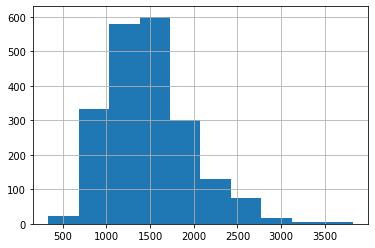

In [26]:
Xtrain_c.GrLivArea.hist()

In [41]:
Xtrain_c.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [19]:
Xtrain_c.dtypes

index              int64
GrLivArea          int64
MSSubClass         int64
MSZoning          object
LotFrontage       object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64


In [18]:
pd.set_option('display.max_rows',None)
ytrain

997      84900
381     181500
1077    159950
416     322500
1377    200000
28      200000
2043    202000
705     185485
2163    119500
2538    159900
955     184000
191      99000
933     129500
2067    157000
2166    137000
1832    235000
1296    157000
676     194000
2402     85000
985     166000
855     138000
1271    302000
2337    317000
1520    138000
1821    147000
2494    222500
2390    155000
1629    185000
2186    208900
350     270000
1157    145000
2179    238000
2342    159895
36      196000
2265    157900
1714    146000
158     245500
383     158000
987     224500
1589    137500
140     102000
465     132500
727     210000
299     126000
1235    180000
397     125500
2459    129500
2122    215000
539     137900
806     192500
9       140000
694     141500
1124    270000
24      105500
1236    110000
1034    177625
720     155000
2325    174000
2035    175000
609     142500
1436    106000
716      93500
1740    151000
595     250000
1802    240000
2484    188000
1949    21